# Grover 算法

## 0 背景

搜索算法是一种在数据集中寻找特定元素或满足特定条件元素的算法，可分为结构化搜索算法和非结构化搜索算法两类。其中非结构化搜索算法是指在无序或者无规律的数据集中进行搜索的算法，Grover 算法正是一种用于非结构化搜索的量子算法。  
举个例子，假设给定一张包含一些城市的地图，希望确定经过所有城市的最短路径。最简单的想法就是遍历所有可能的路径，维护一个最短路径的动态记录。如果有 N 条可能的路线，则在经典计算机中，使用这种方法需要 $O(N)$ 次操作来确定最短路线。而 Grover 算法，有时也被称为量子搜索算法，能实质性地加速此搜索方法，使之只需要 $O(\sqrt{N})$次操作。而且，除了刚才的路径寻找问题，量子搜索算法可以加速许多使用启发式搜索的经典算法，在这个意义下它是通用的。下面将对 Grover 算法进行具体的描述与分析。  

## 1 Grover 搜索

### 1.1 Oracle

假设在含 $N$ 个元素的搜索空间进行搜索，将这些元素的索引记为 $0$ 到 $N - 1$。为了方便，设 $N = 2^n$，则这些索引可存储在 $n$ 个量子比特中。设搜索问题有 $M$ 个解，其中 $1 \leq M \leq N$。同时定义一个函数 $f$，它的输入是 $0$ 到 $N-1$ 之间的整数。若 $x$ 是搜索问题的一个解，则 $f(x)=1$，否则 $f(x)=0$。  
假设有一个可以识别搜索问题的解的量子 $oracle$，其对应一个酉操作 $O$，定义如下：
$$
| x \rangle | q \rangle \overset{O} \rightarrow | x \rangle | q \oplus f(x) \rangle \tag{1}
$$
其中 $| x \rangle$ 是索引寄存器，$\oplus$ 是二进制加法。$| q \rangle$ 是一个单量子比特，称其为 $oracle$ 量子比特，若 $f(x)=1$，则对它进行反转，否则不改变。因此我们可以通过 $oracle$ 量子比特的状态来判断 $| x \rangle$ 是不是搜索问题的一个解。  
在量子搜索算法中，把 $oracle$ 量子比特初始态置为 $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$ 是有用的。若 $x$ 不是搜索问题的一个解，对态 $| x \rangle (\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}})$ 作用的 $oracle$ 不会改变状态；若 $x$ 是搜索问题的一个解，则 $| 0 \rangle$ 和 $| 1 \rangle$ 在 $oracle$ 的作用下交换，量子态变为 $-| x \rangle (\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}})$。于是 $oracle$ 的作用为：
$$
| x \rangle (\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}) \overset{O} \rightarrow (-1)^{f(x)} | x \rangle (\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}) \tag{2}
$$
注意到无论 $x$ 是否是搜索问题的解，$oracle$ 量子比特的状态始终没有改变，均保持为 $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$，为了简化描述，可在之后的算法讨论中将其忽略。在这个约定下， $oracle$ 的行为可以被描述为：
$$
| x \rangle \overset{O} \rightarrow (-1)^{f(x)} | x \rangle \tag{3}
$$

### 1.2 Grover 迭代

量子搜索算法利用了一个 $n$ 位量子比特寄存器和一个 $oracle$ 的工作空间。该算法将 $n$ 个量子比特制备为均匀叠加态后，通过反复作用一个记为 $G$ 的称为 $Grover$ 迭代或 $Grover$ 算子的量子子程序来提高得到正确解的概率，最后进行测量。在 $Grover$ 迭代的过程中需用到 $oracle$，为实现 $oracle$ 可能会用到工作量子比特，但最后的测量与分析只涉及 $n$ 位量子比特寄存器。  
量子搜索算法的电路示意图如下图所示：  
![Grover_algorithm_circuit](./Grover_algorithm_circuit.png#pic_center)

算法开始于状态 $| 0 \rangle ^{\otimes n}$，用阿达玛变换使量子比特处于均匀叠加态
$$
| \psi \rangle = \frac{1}{\sqrt{N}} \sum \limits ^{N-1}_{x=0} | x \rangle \tag{4} 
$$
将 $Grover$ 迭代记为 $G$，则量子搜索算法由反复地作用 $G$ 构成。$Grover$ 迭代可分为如下 4 个步骤：  
1.作用 $oracle$ $O$。    
2.作用阿达玛变换 $H^{\otimes n}$。    
3.执行条件相位偏移，使得除 $| 0 \rangle$ 之外的每个计算基矢态获得一个 $-1$ 的相位偏移：  
$$
|x \rangle \rightarrow - (-1)^{\delta_{x0}} \, | x \rangle \tag{5}
$$
4.作用阿达玛变换 $H^{\otimes n}$  
$Grover$ 迭代的量子电路图如下图所示：  
<img src="./Grover_iteration.png" alt="Grover_iteration" style="zoom:70%;" />  

下面对 $Grover$ 迭代的步骤进行一些分析。不难看出，步骤 3 中的相位偏移对应酉算子 $2 | 0 \rangle \langle 0 | - I$。而步骤2、3、4组合在一起的效果为：  
$$
H^{\otimes n} (2 | 0 \rangle \langle 0 | - I) H^{\otimes n} = 2 | \psi \rangle \langle \psi | - I \tag{6}
$$
其中 $| \psi \rangle$ 为式 (4) 中的均匀叠加态。因此 $Grover$ 迭代可以写成 $G = (2 | \psi \rangle \langle \psi | - I) O$。

### 1.3 几何可视化

在前文中我们已经得到 $G = (2 | \psi \rangle \langle \psi | - I) O$。事实上，我们将证明 $Grover$ 迭代可以被视为一个二维空间的旋转。为了说明这一点，用 $\sum_x^{'}$ 表示搜索问题中所有解的和，用 $\sum_x^{''}$ 表示在搜索问题中所有非解元素的和。定义归一化状态
$$ 
\begin{align}
&| \alpha \rangle \equiv \frac{1}{\sqrt{N-M}} \sum\nolimits_x^{''}|x \rangle \tag{7} \\
&| \beta \rangle \equiv \frac{1}{\sqrt{M}} \sum\nolimits_x^{'}|x \rangle \tag{8}
\end{align}
$$
以 $| \alpha \rangle$、$|\beta \rangle$ 为基，初始态 $| \psi \rangle $ 可以被重新表示为  
$$
|\psi \rangle = \sqrt\frac{{N-M}}{N} | \alpha \rangle + \sqrt\frac{M}{N} |\beta \rangle \tag{9}
$$
$G$ 的作用效果可以用如下方式理解。 $oracle$ 操作 $O$ 是在由 $| \alpha \rangle$ 和 $|\beta \rangle$ 定义的平面上以 $| \alpha \rangle$ 为法线进行反射，即 $O(a | \alpha \rangle + b | \beta \rangle) = a | \alpha \rangle - b | \beta \rangle$。类似地，$2 | \psi \rangle \langle \psi | - I$ 是在由 $| \alpha \rangle$ 和 $|\beta \rangle$ 定义的平面上以 $| \psi \rangle$ 为法线进行反射。并且这两个反射的乘积是一个旋转。令 $cos\frac{\theta}{2} =\sqrt\frac{{N-M}}{N}$，$sin\frac{\theta}{2}=\sqrt\frac{M}{N}$，使得 $| \psi \rangle = cos\frac{\theta}{2}| \alpha \rangle + sin\frac{\theta}{2} |\beta \rangle$。则 $G$ 的作用就是将态逆时针旋转 $\theta$，即
$$
G | \psi \rangle = cos \frac{3\theta}{2} | \alpha \rangle + sin \frac{3\theta}{2} | \beta \rangle \tag{10}
$$
单次 $G$ 的作用如下图所示：
<img src="./Geometric_representation.png" alt="Geometric_representation" style="zoom:60%;" />  


可以证明，在 $| \alpha \rangle$ 和 $ | \beta \rangle$ 基下，$Grover$ 迭代可以写为
$$
G = \begin{pmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{pmatrix} \tag{11}
$$
也即 $G$ 可以视为在 $| \alpha \rangle$ 和 $| \beta \rangle$ 张成的二维空间上的一个旋转，旋转角度为 $\theta$。因此，连续作用 $G$ 将使态变为
$$
G^k | \psi \rangle = cos(\frac{2k+1}{2}\theta)| \alpha \rangle + sin(\frac{2k+1}{2}\theta)| \beta \rangle \tag{12}
$$
$Grover$ 迭代的反复作用可以把状态向量旋转至接近 $| \beta \rangle$ 的位置。这时，通过对测量基上的测量，将以很高的概率得到叠加态 $| \beta \rangle$ 中的一个测量结果，也即搜索问题的一个解。  
假设 $M \leq N/2$，通过数学推导可以证明，为使至少以一半的概率给出搜索问题的一个解，需要进行的 $Grover$ 迭代次数 $R$ 满足
$$
R \leq \lceil \frac{\pi}{4} \sqrt \frac{N}{M} \rceil \tag{13}
$$
其中 $\lceil \rceil$ 表示向上取整。式 (13) 即给出了所需迭代次数的一个上界。

### 1.4 算法总结

前文对 $Grover$ 算法的各个步骤进行了较详细的描述与分析，下面将给出一个对 $M=1$ 情况的量子搜索算法的总结。

**输入：**（1）执行变换 $O |x\rangle |q\rangle = |x\rangle |q \oplus f(x) \rangle$ 的黑盒 $oracle$ $O$，其中对除 $x_0$ 外的所有 $0\leq x < 2^n$，有 $f(x)=0$，而 $f(x_0)=1$；  
（2）处于 $|0\rangle$ 状态的 $n+1$ 个量子比特。  
**输出：**$x_0$  
**运行时间：**$O(\sqrt{2^n})$次操作，以 $O(1)$ 的概率成功。  
**步骤：**  
**1.** $|0 \rangle^{\otimes n} |0 \rangle \qquad$ 初始态  
**2.** $\rightarrow \frac{1}{\sqrt{2^n}} \sum\limits_{x=0}^{2^n-1} |x\rangle [\frac{|0\rangle - |1\rangle}{\sqrt2}] \qquad$ 对前 $n$个量子比特作用 $H^{\otimes n}$，对最后一个量子比特执行 $HX$  
**3.** $\rightarrow [(2 | \psi \rangle \langle \psi | - I) O]^R \frac{1}{\sqrt{2^n}} \sum\limits_{x=0}^{2^n-1} |x\rangle [\frac{|0\rangle - |1\rangle}{\sqrt2}] \approx |x_0 \rangle [\frac{|0\rangle - |1\rangle}{\sqrt2}] \qquad$ 运行 $Grover$ 迭代 $R \approx  \lceil \frac{\pi \sqrt{2^n}}{4} \rceil$ 次  
**4.** $\rightarrow x_0 \qquad$ 对前 $n$ 个量子比特进行测量 

## 2 一个两比特的量子搜索算法例子

这里用一个例子说明量子搜索算法在 $N=4$ 的搜索空间上如何运行。首先，有这样的 $oracle$，对 $x=x_0$ 有 $f(x)=1$，对其他的 $x$，有 $f(x)=0$。此 $oracle$ 的电路是以下四种情况之一：   
<img src="./Oracle.png" alt="oracle" style="zoom:80%;" />  
从左到右分别对应 $x_0=0,1,2,3$，上面两个量子比特代表查询位 $x$，底部的量子比特携带 $oracle$ 的回答。初始阿达玛变换和一次 $Grover$ 迭代 $G$ 的量子电路图如下所示：    
<img src="./Grover_example.png" alt="Grover_example" style="zoom:60%;" />   
初始时，上面两个量子比特处于状态 $| 0 \rangle$，底部量子比特处于 $|1 \rangle$。虚线框中的量子门执行相位偏移操作 $2 | \psi \rangle \langle \psi | - I$。将 $M=1,N=4$ 代入式 (13)，我们发现需要迭代的次数少于一次。用前文的几何图形描述，我们的初始状态为 $| \psi \rangle = (|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle)/2$，距离 $| \alpha \rangle$ 的角度为 $30^\circ$，一次旋转 $\theta = 60^\circ$ 即可从状态 $| \psi \rangle$ 移到状态 $| \beta \rangle$。执行一次 $oracle$ 之后上面两个量子比特的测量结果会给出 $x_0$。而经典计算机或经典电路，尝试区分这四种 $oracle$ 平均需要 2.25 次查询。

## 3 Grover 算法的 pyquafu 实现

下面将用 pyquafu 实现第2节中的两比特的 $Grover$ 算法的例子。其中 $oracle$ 选用第4种情况，即选用 Toffoli 门，仅当前两个量子比特均为 $|1\rangle$ 时，第三个量子比特才会翻转。（为使绘制的电路图更加清晰，此代码在量子电路中加入了很多 barrier。如果在真机上运行效果不佳，可适当删去一些 barrier 以提升表现）

In [1]:
# 导入所需的包
from quafu import QuantumCircuit, simulate, Task

# 定义进行相位偏移的函数
def phase_shift(q):
    for i in range(2):
        q.x(i)
    q.h(1)
    q.cnot(0,1)
    q.h(1)
    for i in range(2):
        q.x(i)
    return q

# 构造量子电路
qc = QuantumCircuit(3)
qc.x(2) # 将oracle量子比特翻转为|1>
for i in range(3):  # 制备叠加态
    qc.h(i)
qc.barrier([0,1,2])
qc.mcx([0,1],2) # 作用oracle O
qc.barrier([0,1,2])
for i in range(2):
    qc.h(i)
qc.barrier([0,1,2])
phase_shift(qc) # 进行相位偏移
qc.barrier([0,1,2])
for i in range(3):
    qc.h(i)
qc.barrier([0,1,2])
qc.measure([0,1])

将所构造的量子电路可视化。可将其与第2节中的量子电路图进行比较。

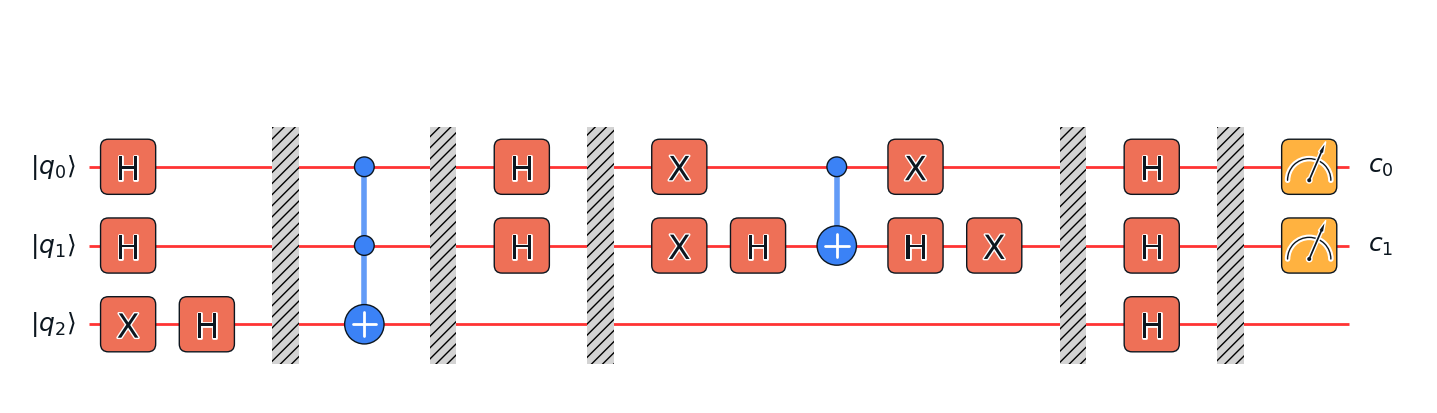

In [2]:
qc.plot_circuit()

### 3.1 模拟器模拟结果

使用模拟器模拟上述量子电路的运行结果，并绘制得到各个量子态的概率。

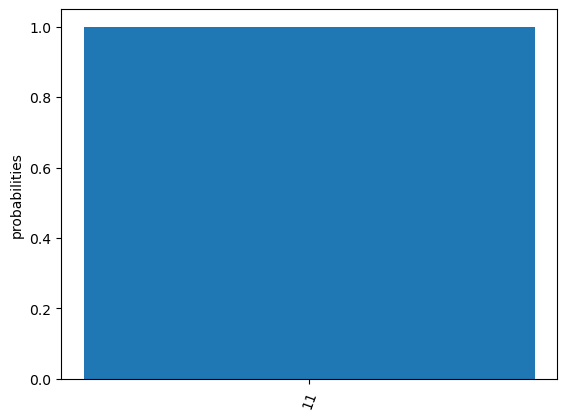

In [3]:
simu_res = simulate(qc,output="probabilities")
simu_res.plot_probabilities()

模拟器模拟的结果是全部为 $|11\rangle$ 态，与之前的理论分析相符。

### 3.2 真机运行结果

创建 task，将量子电路上传至量子计算机真机上运行。为使结果更加准确，运行的量子电路是删去了一些 barrier 后的电路，与绘图所用电路不完全一致。

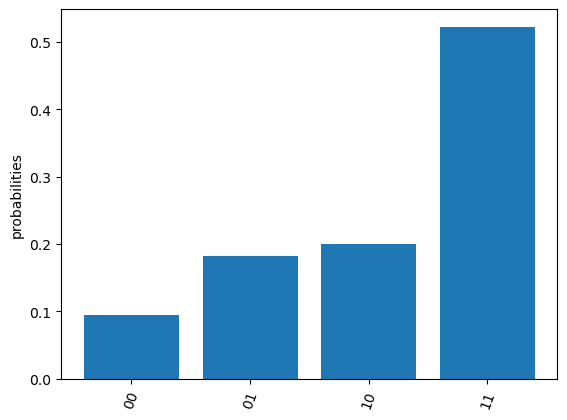

In [4]:
task = Task()  # 创建并配置Task 
task.config(backend="ScQ-P18", shots=5000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
res = task.send(qc,name="Grover_algorithm")
res.plot_probabilities()

理论上测得 $|11\rangle$ 的概率应为 1，真机上运行的结果与理论有一些偏差。出现偏差的可能原因是该量子电路的量子门操作较多，量子线路的深度较深。在门保真度与量子比特相干时间有限的情况下，过深的量子线路会导致实验结果与理论偏差较大。  
不过在真机得到的结果中，测得 $|11\rangle$ 的概率仍远大于测得其他量子态的概率，可以清晰地辨认。因此已成功地进行了 $Grover$ 算法的演示。